In [2]:
import pandas as pd
import numpy as np
from sklearn.mixture import GaussianMixture as gmm
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./GMM_clust.csv", index_col=0,encoding="cp949")
df

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
0,다대포해수욕장,다대1동,37932,345,68.0,38523,0
1,다대포항,다대1동,37932,345,76.0,38523,0
2,낫개,다대2동,50774,246,24.0,26678,0
3,신장림,장림2동,33475,302,78.0,27244,0
4,장림,장림2동,33475,302,24.0,27244,0
...,...,...,...,...,...,...,...
95,서동,서2동,24707,102,12.0,8999,0
97,반여농산물시장,반송1동,29243,159,42.0,13982,0
98,석대,반송1동,29243,159,10.0,13982,0
99,영산대,반송1동,29243,159,9.0,13982,0


In [4]:
param = np.array(df[[ '유동인구', '업장수', '전체 상가 면적', '전체인구수']])
len(param)

92

In [5]:
use_df = df[['역사명', '동별', '유동인구', '업장수', '전체 상가 면적', '전체인구수']].dropna()
use_df.head()

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수
0,다대포해수욕장,다대1동,37932,345,68.0,38523
1,다대포항,다대1동,37932,345,76.0,38523
2,낫개,다대2동,50774,246,24.0,26678
3,신장림,장림2동,33475,302,78.0,27244
4,장림,장림2동,33475,302,24.0,27244


### 정규화(minmaxscaler)

In [6]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [7]:
param.max()

352597.0

In [8]:
param.min()

0.0

In [9]:
param

array([[3.79320e+04, 3.45000e+02, 6.80000e+01, 3.85230e+04],
       [3.79320e+04, 3.45000e+02, 7.60000e+01, 3.85230e+04],
       [5.07740e+04, 2.46000e+02, 2.40000e+01, 2.66780e+04],
       [3.34750e+04, 3.02000e+02, 7.80000e+01, 2.72440e+04],
       [3.34750e+04, 3.02000e+02, 2.40000e+01, 2.72440e+04],
       [4.01090e+04, 2.22000e+02, 1.90000e+01, 1.68580e+04],
       [6.89870e+04, 1.77000e+02, 2.87000e+02, 1.78870e+04],
       [1.77317e+05, 3.74000e+02, 1.66000e+02, 2.15830e+04],
       [6.66400e+04, 4.12000e+02, 2.80000e+01, 2.59820e+04],
       [4.29320e+04, 1.85000e+02, 1.70000e+01, 1.19880e+04],
       [9.31150e+04, 2.34000e+02, 8.70000e+01, 1.90740e+04],
       [3.83530e+04, 1.54000e+02, 9.00000e+00, 1.56030e+04],
       [6.46150e+04, 1.64000e+02, 8.00000e+00, 1.46220e+04],
       [6.46150e+04, 1.64000e+02, 1.70000e+01, 1.46220e+04],
       [8.44260e+04, 1.81000e+02, 7.50000e+01, 1.00720e+04],
       [1.75621e+05, 3.91000e+02, 5.93000e+02, 1.12400e+03],
       [9.81520e+04, 7.3

In [10]:
scaler = MinMaxScaler()
scaler.fit(param)
df_scaled = scaler.transform(param)

In [11]:
# minmaxscaler
df_scaled

array([[1.07578907e-01, 2.05478450e-03, 3.52072686e-02, 1.00000000e+00],
       [1.07578907e-01, 2.05478450e-03, 3.97501420e-02, 1.00000000e+00],
       [1.44000091e-01, 1.33085687e-03, 1.02214651e-02, 6.83280302e-01],
       [9.49384141e-02, 1.74035129e-03, 4.08858603e-02, 6.98414396e-01],
       [9.49384141e-02, 1.74035129e-03, 1.02214651e-02, 6.98414396e-01],
       [1.13753095e-01, 1.15535926e-03, 7.38216922e-03, 4.20706436e-01],
       [1.95653962e-01, 8.26301242e-04, 1.59568427e-01, 4.48220541e-01],
       [5.02888567e-01, 2.26684411e-03, 9.08574673e-02, 5.47046712e-01],
       [1.88997638e-01, 2.54471533e-03, 1.24929018e-02, 6.64670178e-01],
       [1.21759402e-01, 8.84800445e-04, 6.24645088e-03, 2.90489051e-01],
       [2.64083359e-01, 1.24310806e-03, 4.59965928e-02, 4.79959357e-01],
       [1.08772905e-01, 6.58116033e-04, 1.70357751e-03, 3.87149389e-01],
       [1.83254537e-01, 7.31240037e-04, 1.13571834e-03, 3.60918741e-01],
       [1.83254537e-01, 7.31240037e-04, 6.24645088e

### GMM

In [50]:
gm = gmm(n_components=3,random_state=42)
labels = gm.fit_predict(df_scaled)

In [51]:
for i in range(0,3):
    print(np.count_nonzero(labels == i))
# 군집 0 : 60개
# 군집 1 : 5개
# 군집 2 : 27개


60
5
27


In [52]:
use_df['group'] = labels
use_df.head()

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
0,다대포해수욕장,다대1동,37932,345,68.0,38523,0
1,다대포항,다대1동,37932,345,76.0,38523,0
2,낫개,다대2동,50774,246,24.0,26678,0
3,신장림,장림2동,33475,302,78.0,27244,0
4,장림,장림2동,33475,302,24.0,27244,0


In [59]:
use_df[use_df['group']==2]

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
6,신평,신평2동,68987,177,287.0,17887,2
7,하단,하단1동,177317,374,166.0,21583,2
15,자갈치,남포동,175621,391,593.0,1124,2
17,중앙,중앙동,98152,734,791.0,3669,2
18,부산,초량1동,183298,102,140.0,5867,2
19,초량,초량3동,62518,232,515.0,13505,2
23,범내골,범천1동,99524,894,45.0,12555,2
25,부전,부전1동,173304,973,101.0,15989,2
26,양정,양정2동,124542,235,111.0,12002,2
27,시청,연산2동,143975,173,96.0,20089,2


In [57]:
use_df[use_df['group']==1]

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
24,서면,부전2동,352597,136818,130.0,10868,1
28,연산,연산4동,183140,59838,286.0,16006,1
30,동래,온천2동,174176,36658,746.0,24383,1
47,수영,광안3동,147560,24340,1767.0,9740,1
84,미남,온천3동,93628,15667,952.0,38172,1


In [61]:
use_df[use_df['group']==0]

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
0,다대포해수욕장,다대1동,37932,345,68.0,38523,0
1,다대포항,다대1동,37932,345,76.0,38523,0
2,낫개,다대2동,50774,246,24.0,26678,0
3,신장림,장림2동,33475,302,78.0,27244,0
4,장림,장림2동,33475,302,24.0,27244,0
5,동매,신평1동,40109,222,19.0,16858,0
8,당리,당리동,66640,412,28.0,25982,0
9,사하,괴정4동,42932,185,17.0,11988,0
10,괴정,괴정1동,93115,234,87.0,19074,0
11,대티,괴정2동,38353,154,9.0,15603,0


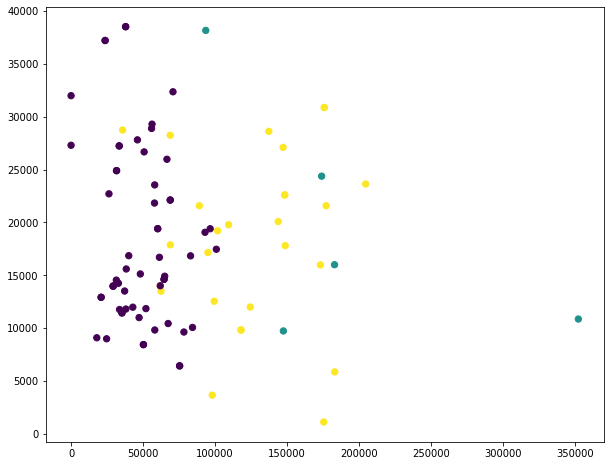

In [54]:
전체인구수 = plt.figure(figsize=(10,8))

전체인구수 = plt.scatter(use_df['유동인구'], use_df['전체인구수'], c=labels, s=40, cmap='viridis');
전체인구수

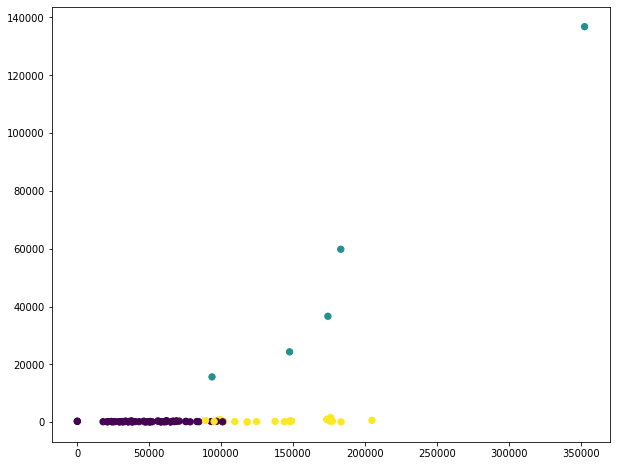

In [55]:
업장수 = plt.figure(figsize=(10,8))

업장수 = plt.scatter(use_df['유동인구'], use_df['업장수'], c=labels, s=40, cmap='viridis');

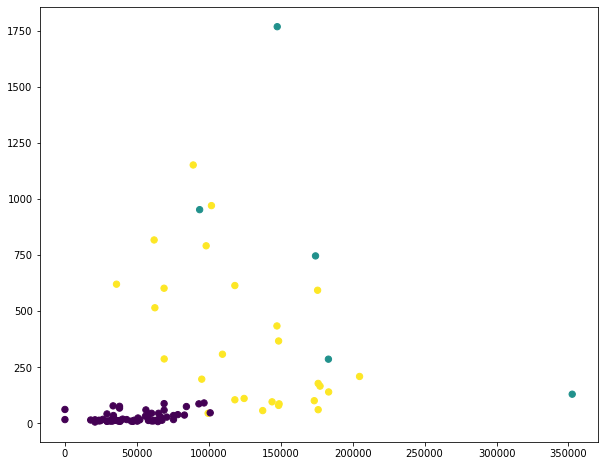

In [56]:
전체_상가_면적 = plt.figure(figsize=(10,8))

전체_상가_면적 = plt.scatter(use_df['유동인구'], use_df['전체 상가 면적'], c=labels, s=40, cmap='viridis');
# 면적구간 필요

In [39]:
use_df

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
0,다대포해수욕장,다대1동,37932,345,68.0,38523,2
1,다대포항,다대1동,37932,345,76.0,38523,2
2,낫개,다대2동,50774,246,24.0,26678,0
3,신장림,장림2동,33475,302,78.0,27244,2
4,장림,장림2동,33475,302,24.0,27244,0
...,...,...,...,...,...,...,...
95,서동,서2동,24707,102,12.0,8999,0
97,반여농산물시장,반송1동,29243,159,42.0,13982,0
98,석대,반송1동,29243,159,10.0,13982,0
99,영산대,반송1동,29243,159,9.0,13982,0


In [22]:
rank = pd.read_csv("./종합_점수_계산_가중치_x (1).csv", index_col=0, encoding="cp949")
rank.head()

,역사명,동별,역위도,역경도,총 상가 수,공실 상가 수,전체 상가 면적,공실 상가 면적,일평균승하차 레벨,업장수 레벨,1인 가구수 레벨,20~40대 인구 수 레벨,고속버스 터미널,환승,기차역,여객 터미널,주변 관광지,주변 대학교,종합점수
0,사상,괘법동,35.162361,128.984621,6.0,0.0,209.0,0.0,99,89,100,95,1.0,0.0,1.0,0.0,0,1,103.50
1,부전,부전1동,35.162587,129.062952,3.0,2.0,101.0,70.0,93,92,94,72,0.0,0.0,1.0,0.0,4,1,95.25
2,미남,온천3동,35.205503,129.068061,11.0,0.0,952.0,0.0,73,95,94,99,0.0,1.0,0.0,0.0,0,0,92.75
3,전포,전포1동,35.153102,129.065374,33.0,11.0,1151.0,422.0,71,88,93,98,0.0,0.0,0.0,0.0,2,1,92.50
4,온천장,온천1동,35.220249,129.086437,10.0,0.0,367.0,0.0,88,67,91,88,0.0,0.0,0.0,0.0,0,1,86.00


In [24]:
rank_weight = rank[["역사명", "종합점수"]]
rank_weight.head()

,역사명,종합점수
0,사상,103.50
1,부전,95.25
2,미남,92.75
3,전포,92.50
4,온천장,86.00


In [29]:
merge_rank1 = pd.merge(rank_weight, use_df, how="inner", on="역사명")
merge_rank1.head(20)

,역사명,종합점수,동별,유동인구,업장수,전체 상가 면적,전체인구수,group
0,사상,103.50,괘법동,204786,653,209.0,23641,2
1,부전,95.25,부전1동,173304,973,101.0,15989,2
2,미남,92.75,온천3동,93628,15667,952.0,38172,1
3,전포,92.50,전포1동,89158,597,1151.0,21585,2
4,온천장,86.00,온천1동,148518,318,367.0,22605,2
5,서면,85.25,부전2동,352597,136818,130.0,10868,1
6,센텀시티,84.00,우2동,176018,1586,178.0,30878,2
7,연산,83.00,연산4동,183140,59838,286.0,16006,1
8,하단,82.75,하단1동,177317,374,166.0,21583,2
9,부산대,81.25,장전2동,147359,422,434.0,27106,2


In [31]:
merge_rank2 = pd.merge(use_df, rank_weight, how="inner", on="역사명")
merge_rank2.head(20)

,역사명,동별,유동인구,업장수,전체 상가 면적,전체인구수,group,종합점수
0,다대포해수욕장,다대1동,37932,345,68.0,38523,0,76.25
1,다대포항,다대1동,37932,345,76.0,38523,0,73.75
2,신장림,장림2동,33475,302,78.0,27244,0,56.25
3,신평,신평2동,68987,177,287.0,17887,2,46.50
4,하단,하단1동,177317,374,166.0,21583,2,82.75
5,괴정,괴정1동,93115,234,87.0,19074,0,54.25
6,토성,충무동,84426,181,75.0,10072,0,48.75
7,자갈치,남포동,175621,391,593.0,1124,2,49.50
8,중앙,중앙동,98152,734,791.0,3669,2,50.25
9,부산,초량1동,183298,102,140.0,5867,2,37.25
